# Brief Régression Logistique

La régression logistique consiste à prédire des variables binaires et non à prédire des variables continues.


## 1. Réaliser une veille sur la régression logistique (vous pouvez vous aider du tutoriel)


## 2. Récupérer les données CSV
3. Après avoir analysé et pré-traité les données, charger celles-ci dans une base de données relationnelle MySQL.
4. Utiliser un jupyter-notebook pour le travail qui suit.


## 5. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

In [36]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
import seaborn as sns
  
# SQLAlchemy connectable 
engine = create_engine("mysql+pymysql://root@localhost/apple_shop")

df = pd.read_sql_query('SELECT * FROM apple_shop limit 10',engine)
print(df)


     UserID  Gender Age EstimatedSalary  Purchased
0  15624510    Male  19           19000          0
1  15810944    Male  35           20000          0
2  15668575  Female  26           43000          0
3  15603246  Female  27           57000          0
4  15804002    Male  19           76000          0
5  15728773    Male  27           58000          0
6  15598044  Female  27           84000          0
7  15694829  Female  32          150000          1
8  15600575    Male  25           33000          0
9  15727311  Female  35           65000          0


       UserID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


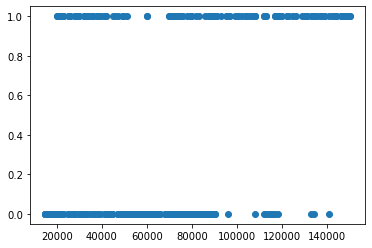

In [316]:
import seaborn as sns
  
# SQLAlchemy connectable 
engine = create_engine("mysql+pymysql://root@localhost/apple_shop")

# table named 'contacts' will be returned as a dataframe. 
apple_data = pd.read_sql_table('apple_shop', engine) 

print(apple_data)
plt.scatter(apple_data.EstimatedSalary, apple_data.Purchased) 


In [319]:
apple_data['Gender'] = pd.get_dummies(apple_data['Gender'])

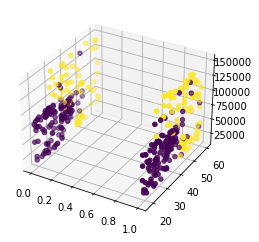

In [320]:
ax = plt.axes(projection='3d')
ax.scatter(apple_data.Gender,apple_data.Age,apple_data.EstimatedSalary, c=apple_data.Purchased)

## Algorithme avec la librairie sklearn univariée:

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# On charge le dataset
from sqlalchemy import create_engine 
#SQLAlchemy connectable 
engine = create_engine("mysql+pymysql://root@localhost/apple_shop")

apple_data = pd.read_sql_table('apple_shop', engine) 
X = np.matrix([apple_data["EstimatedSalary"]]).T
y = apple_data["Purchased"]

clf = LogisticRegression().fit(X, y)
clf.predict(X)

clf.predict_proba(X)
clf.score(X, y)

0.6425

## Algorithme avec la librairie sklearn multivariée (âge , EstimatedSalary):

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# On charge le dataset
from sqlalchemy import create_engine 
#SQLAlchemy connectable 
engine = create_engine("mysql+pymysql://root@localhost/apple_shop")

apple_data = pd.read_sql_table('apple_shop', engine) 

apple_data['Gender'] = pd.get_dummies(apple_data['Gender'])

xtrain, xtest, ytrain, ytest = train_test_split(apple_data[["Age", "EstimatedSalary"]], apple_data["Purchased"], test_size=0.2, random_state=0)

#Feature Scaling
#sc = StandardScaler()
#xtrain= sc.fit_transform(xtrain)
#xtest = sc.transform(xtest)

clf = LogisticRegression().fit(xtrain, ytrain)
pred = clf.predict(xtest)
#print(pred)

proba = clf.predict_proba(xtest)
#print(proba)
print("LogisticRegression score:",round(clf.score(xtest, ytest),2))

rfc = RandomForestClassifier().fit(xtrain, ytrain)
pred = rfc.predict(xtest)
#print(pred)

proba = rfc.predict_proba(xtest)
#print(proba)
print("Random forest score:",round(rfc.score(xtest, ytest),2))


LogisticRegression score: 0.72
Random forest score: 0.92


## Si maintenant nous avons un nouveau client potentiel qui a 37 ans et gagne 67000 $, pouvons-nous prédire s'il achètera un iPhone ou non (Acheter? / Ne pas acheter?)


In [266]:
#X = np.matrix([apple_data["Age"].values,apple_data["EstimatedSalary"].values]).T
X = apple_data[["Age","EstimatedSalary"]].values
y = apple_data["Purchased"]

clf = LogisticRegression().fit(X, y)
print(clf.predict([[37,67000]]))

[0]


In [267]:
#X = np.matrix([apple_data["UserID"].values,apple_data["Gender"].values,apple_data["Age"].values,apple_data["EstimatedSalary"].values]).T
X = apple_data[["UserID","Gender","Age","EstimatedSalary"]].values
y = apple_data["Purchased"]

clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict([[15694829,0,32,150000]]))

[1]


## 7. Résoudre le cas d’étude présenté ci-dessous avec votre propre classe python sans utiliser la librairie Scikit-Learn.

Class Logistic_regression en cross_entropie multivariée (genre, âge , EstimatedSalary) avec opt

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import scipy.optimize as opt
from sklearn.metrics import precision_score, recall_score

# On charge le dataset
from sqlalchemy import create_engine 
engine = create_engine("mysql+pymysql://root@localhost/apple_shop")

apple_data = pd.read_sql_table('apple_shop', engine) 

apple_data['Gender'] = pd.get_dummies(apple_data['Gender'])
#apple_data['Gender'].replace({"Male":0, "Female":1})

X = np.matrix([np.ones(apple_data.shape[0]),apple_data["Gender"].values,apple_data["Age"].values,apple_data["EstimatedSalary"].values])
y = np.matrix(apple_data["Purchased"])

class Logistic_Regression:
    
    import numpy as np
    
    def sigmoid(self,Z):
        self.Z=Z        
        proba = np.exp(Z)/(1+np.exp(Z))
        return proba   
    
    def cost_function(self,theta,X,y):
        self.X=X
        self.y=y
        self.theta=theta
        n,m=X.shape
        j_theta = -1/m*(np.log(self.sigmoid(theta.dot(X))).dot(y.T)+np.log(1-self.sigmoid(theta.dot(X))).dot((1-y).T))
        grad = (1/m)*(self.sigmoid(theta.dot(X))-y).dot(X.T)         
        return [j_theta,grad]      
           
    def predict(self,X,theta):
        self.X=X
        self.theta=theta
        (n,m)=X.shape
        proba = self.sigmoid(theta.dot(X))  #(1,4)*(4,400) = (1,400)
        
        pred = np.matrix([np.zeros(m)])
        for c in range(0,m): 
            if proba[0,c]>0.5:
                pred[0,c] = 1
            else :
                pred[0,c] = 0            
        return pred

theta = np.matrix([0,0,0,0])
log_reg = Logistic_Regression()
[j_theta,grad]  = log_reg.cost_function(theta,X,y)

print("[j_theta,grad] :",[j_theta,grad])
n,m = X.shape;
initial_theta = np.zeros(n);
optimal_theta,NF,NIT = opt.fmin_tnc(func=log_reg.cost_function, x0=initial_theta, args=(X, y))
print("optimal_theta :",optimal_theta)
pred = log_reg.predict(X,optimal_theta)
#print(pred)
#print(y)

print("precision :", round(precision_score(y, pred, average='weighted'),2))

#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y,pred)
#print(cm)

[j_theta,grad] : [matrix([[0.69314718]]), matrix([[1.42500e-01, 6.25000e-02, 2.24250e+00, 4.02875e+03]])]
optimal_theta : [-1.15655492e+01 -3.64819875e-01  2.21585079e-01  3.33047152e-05]
precision : 0.73


In [322]:
print(log_reg.predict(np.matrix([[1,0,37,67000]]).T,optimal_theta))
print("Si maintenant nous avons un nouveau client potentiel qui a 37 ans et gagne 67000 $, pouvons-nous prédire s'il achètera un iPhone ou non (Acheter? / Ne pas acheter?)")
print("A priori, la réponse est non , même réponse qu'avec la librairie sklearn")

[[0.]]
Si maintenant nous avons un nouveau client potentiel qui a 37 ans et gagne 67000 $, pouvons-nous prédire s'il achètera un iPhone ou non (Acheter? / Ne pas acheter?)
A priori, la réponse est non , même réponse qu'avec la librairie sklearn
